In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-support-ticket-dataset/customer_support_tickets.csv


In [2]:
df=pd.read_csv("/kaggle/input/customer-support-ticket-dataset/customer_support_tickets.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

df.tail()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0
8468,8469,Steven Davis MD,lori20@example.net,53,Other,Philips Hue Lights,2020-06-01,Billing inquiry,Hardware issue,There seems to be a hardware problem with my {...,Open,NaN,High,Phone,NaN,NaN,NaN


In [4]:
df.reset_index()
df.head(1)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN


In [5]:
#Drop missing values for efficient analysis
df.dropna()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,Craig Forbes,jessica60@example.org,62,Female,MacBook Pro,2020-03-29,Refund request,Display issue,I'm having an issue with the {product_purchase...,Closed,Interesting show must successful.,Critical,Phone,2023-06-01 14:14:05,2023-06-01 05:47:05,3.0
8453,8454,Paula Vazquez,wanderson@example.com,61,Other,iPhone,2020-06-20,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,Closed,Skill expect admit and.,High,Chat,2023-06-01 12:56:06,2023-06-01 04:45:06,5.0
8455,8456,Ariel Lee,thompsonsamuel@example.org,54,Other,Dyson Vacuum Cleaner,2021-02-02,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",Closed,Say position key appear behavior.,High,Email,2023-06-01 14:15:07,2023-06-01 06:58:07,1.0
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0


In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
results={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row["Ticket Description"]
    m_id=row["Ticket ID"]
    results[m_id]=sia.polarity_scores(text)



  0%|          | 0/8469 [00:00<?, ?it/s]

In [8]:
vader = pd.DataFrame(results).T
vader=vader.reset_index().rename(columns={"index":"Ticket ID"})
data= vader.merge(df,how="left")

In [9]:
data.head(2)

,Ticket ID,neg,neu,pos,compound,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,...,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,0.0,0.854,0.146,0.5423,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,...,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,0.0,0.897,0.103,0.4019,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,...,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN


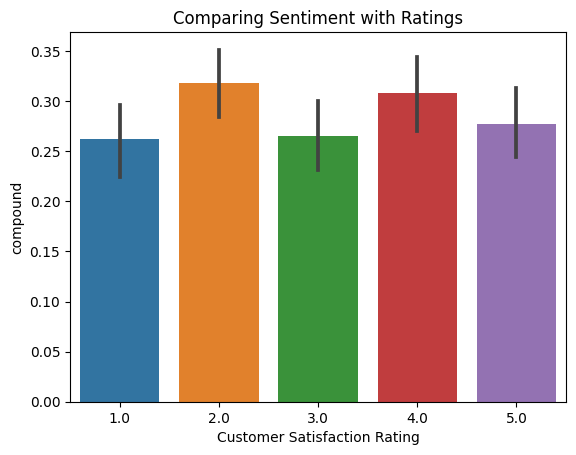

In [10]:
import seaborn as sns #For data visualization
import matplotlib.pyplot as plt #For data visualization

#Compare the sentiments with the Customer Satisfaction Rating
sns.barplot(x="Customer Satisfaction Rating",y="compound",data=data)
plt.title("Comparing Sentiment with Ratings")
plt.show();


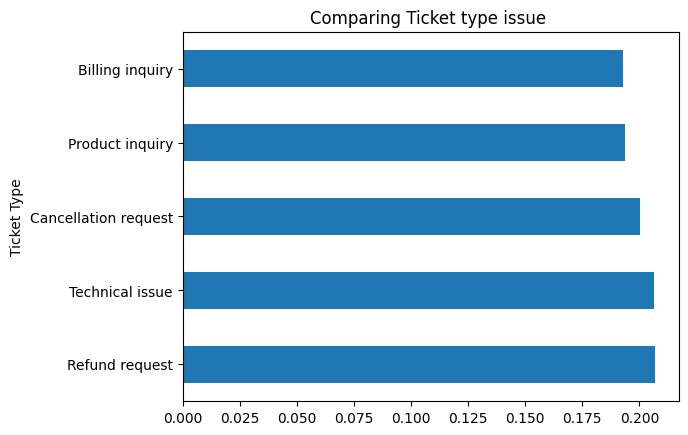

In [11]:
df["Ticket Type"].value_counts(normalize=True).plot(kind="barh")
plt.title("Comparing Ticket type issue ")
plt.show();

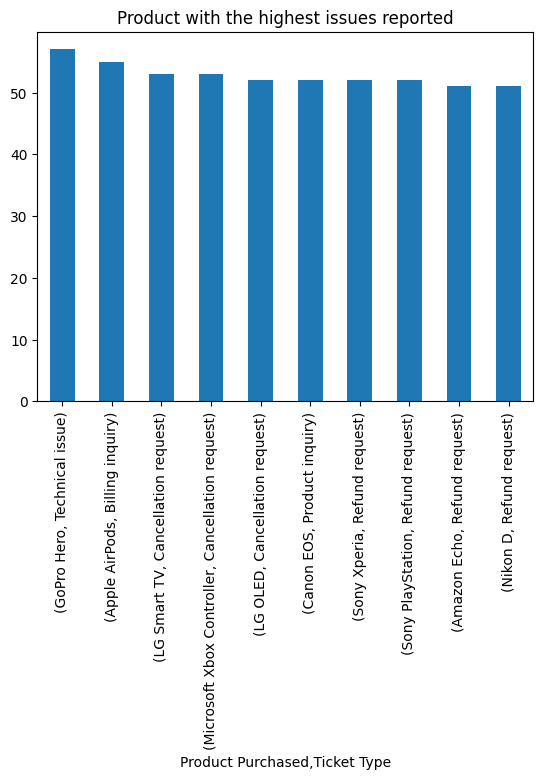

In [12]:
product = data.groupby("Product Purchased")["Ticket Type"].value_counts().sort_values(ascending=False).head(10)
product .plot(kind="bar")
plt.title("Product with the highest issues reported")
plt.show();


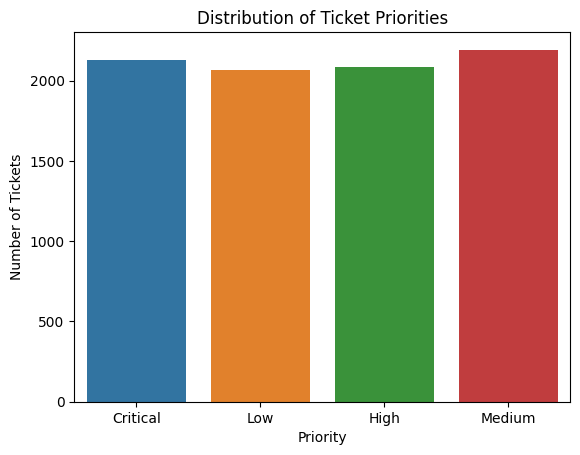

In [17]:
sns.countplot(data=df, x='Ticket Priority')
plt.title('Distribution of Ticket Priorities')
plt.xlabel('Priority')
plt.ylabel('Number of Tickets')
plt.show()


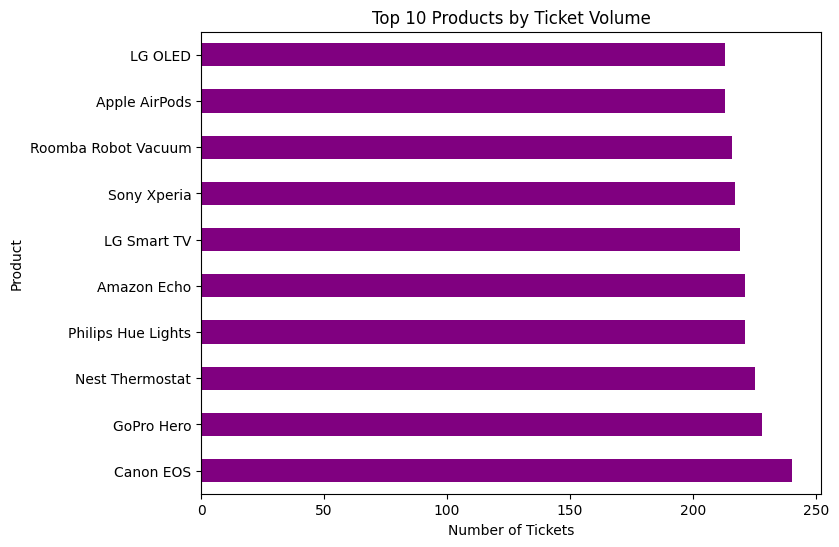

In [15]:
top_products = df['Product Purchased'].value_counts().nlargest(10)
top_products.plot(kind='barh', color='purple', figsize=(8,6))
plt.title('Top 10 Products by Ticket Volume')
plt.xlabel('Number of Tickets')
plt.ylabel('Product')
plt.show()

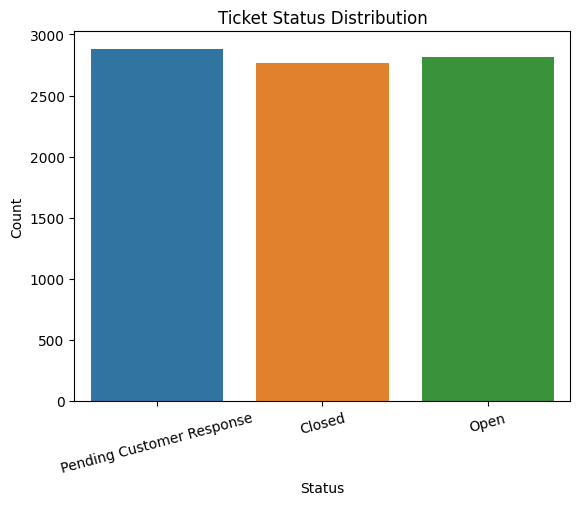

In [16]:
sns.countplot(data=df, x='Ticket Status')
plt.title('Ticket Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

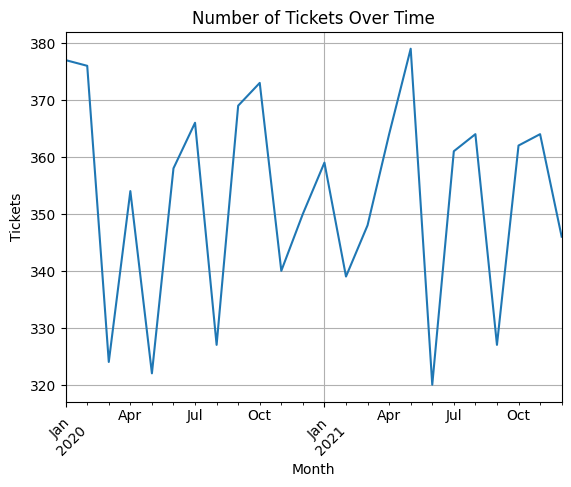

In [19]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
monthly_tickets = df['Date of Purchase'].dt.to_period('M').value_counts().sort_index()

monthly_tickets.plot(kind='line')
plt.title('Number of Tickets Over Time')
plt.xlabel('Month')
plt.ylabel('Tickets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


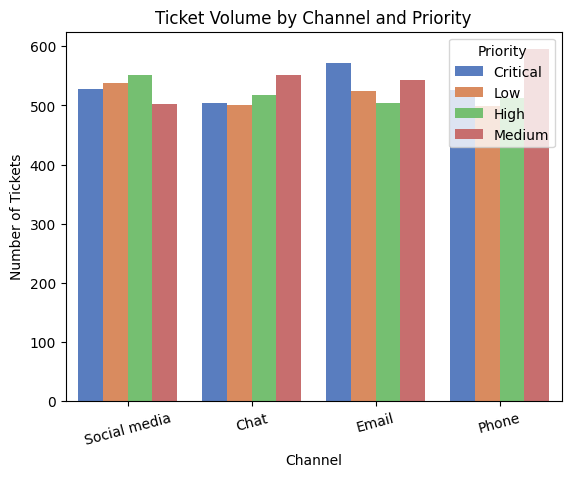

In [20]:
sns.countplot(data=df, x='Ticket Channel', hue='Ticket Priority', palette='muted')
plt.title('Ticket Volume by Channel and Priority')
plt.xlabel('Channel')
plt.ylabel('Number of Tickets')
plt.legend(title='Priority')
plt.xticks(rotation=15)
plt.show()